In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import datetime
from pandas_datareader import data as pdr
import ivolat3

In [41]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2019,1,1)
end = datetime.date.today()

# use quandl for american stocks

# use datareader for european stocks
besi = pdr.DataReader('BESI.AS','yahoo',start,end)
sp500 = pdr.DataReader('^GSPC','yahoo',start,end)


In [59]:
besi_stock =pd.DataFrame({
    'BESI Close': besi['Adj Close']
})
sig =np.std(besi_stock)
sig

BESI Close    2.364528
dtype: float64

In [43]:
sp500_df = pd.DataFrame({
    "SP500 Adj Close":sp500['Adj Close']
})

In [60]:
s = besi_stock.iloc[-1]
k = 22
r = 0.003
q = 0.1
t = 14/365
sigma = sig


In [61]:
p = ivolat3.prem_call(s,k,r,q,t,sigma)
p



3.2507434965614976

In [62]:
ivolat3.ivolat_call(s, k, r, q, t, p)

2.3645280998812397

In [89]:
c =besi_stock.mean()
c

BESI Close    21.630087
dtype: float64

In [87]:
c+ivolat3.ivolat_call(s, k, r, q, t, p)

BESI Close    23.994615
dtype: float64

In [86]:
c-ivolat3.ivolat_call(s, k, r, q, t, p)

BESI Close    19.265559
dtype: float64

(array([0.00321937, 0.        , 0.        , 0.00643874, 0.00321937,
        0.01287748, 0.02253559, 0.0321937 , 0.02897433, 0.02253559,
        0.03863244, 0.06760677, 0.08048425, 0.07404551, 0.10301984,
        0.12233606, 0.12555543, 0.14165228, 0.12233606, 0.13521354,
        0.15452976, 0.16418787, 0.16418787, 0.13843291, 0.1609685 ,
        0.15452976, 0.14809102, 0.11589732, 0.09980047, 0.15131039,
        0.11589732, 0.08692299, 0.06760677, 0.07404551, 0.06760677,
        0.04507118, 0.04829055, 0.0321937 , 0.02575496, 0.01287748,
        0.00965811, 0.00321937, 0.01609685, 0.00321937, 0.00643874,
        0.        , 0.        , 0.00321937, 0.        , 0.00643874]),
 array([14.49361199, 14.80423177, 15.11485156, 15.42547135, 15.73609114,
        16.04671092, 16.35733071, 16.6679505 , 16.97857029, 17.28919008,
        17.59980986, 17.91042965, 18.22104944, 18.53166923, 18.84228901,
        19.1529088 , 19.46352859, 19.77414838, 20.08476816, 20.39538795,
        20.70600774, 21.01

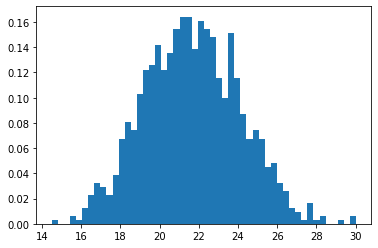

In [97]:
mu = c


d = np.random.normal(mu,sigma,1000)
plt.hist(d, 50, density=True)